<a href="https://colab.research.google.com/github/geetha2612/deep__learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
import numpy as np

# Define the XOR data
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output_data = np.array([[0], [1], [1], [0]])

# Build the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(2,), activation='relu'),  # Input layer with 2 units
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit (sigmoid activation for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(input_data, output_data, epochs=1000, batch_size=4)

# Evaluate the model
loss, accuracy = model.evaluate(input_data, output_data)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(input_data)
print("Predictions:")
print(predictions)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.7678 - accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.7673 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7668 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.7663 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7658 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7654 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.7649 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.7645 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.7640 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.7636 - accuracy: 0.5000
Epoch 11/10

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras import utils
from utils import np_utils
from tqdm import tqdm


ModuleNotFoundError: ignored

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional,  SpatialDropout1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
%matplotlib inline
import warnings

In [ ]:
#!pip install nltk
#import nltk

#nltk.download('wordnet')
import nltk
import subprocess
nltk.download('stopwords')
# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /kaggle/working/...


In [ ]:
data=pd.read_csv("/content/IMDB Dataset.csv")
data.head()
print(len(data))
data['sentiment'].value_counts()

50000


positive    25000
negative    25000
Name: sentiment, dtype: int64

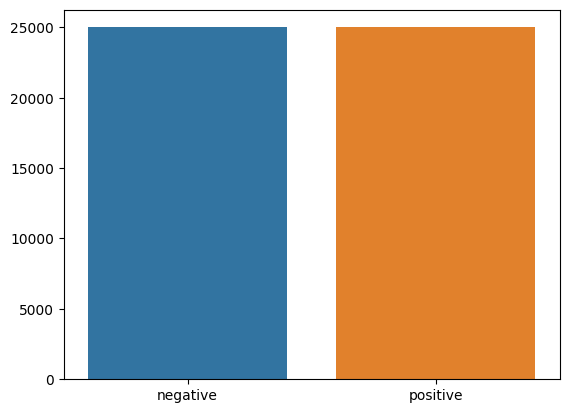

In [ ]:
import seaborn as sns
df=data['sentiment'].value_counts()
sns.barplot(x=np.array(['negative','positive']),y=df.values)
plt.show()

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove('not')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # lowercase text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    text = re.sub(r'\W', ' ', text) # Remove all the special characters
    text = re.sub(r'\d+', '', text) # remove numerical values
    text = re.sub(r'<.*?>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # remove all single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # Remove single characters from the start
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Substituting multiple spaces with single space
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split()) # perform lemmatization
    return text

data['review'] = data['review'].apply(clean_text)

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_Number_of_WORDS = 10000 #50000

# Max number of words in each review.
MAX_lenght_of_sequeunce = 250

# fixing the dimention of the word embedding vector
Embedding_Dimention = 100

# Create a tokenizer object with specified parameters
tokenizer = Tokenizer(num_words=MAX_Number_of_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(data['review'].values)

# Get the word-to-index mapping for the tokenizer
word_index = tokenizer.word_index

# Print the number of unique tokens in the vocabulary
print('Found %s unique tokens.' % len(word_index))

# Convert the text data to sequences of integers
X = tokenizer.texts_to_sequences(data['review'].values)

# Pad or truncate sequences to a fixed length
X = pad_sequences(X, maxlen=MAX_lenght_of_sequeunce)

# Print the shape of the data tensor
print('Shape of data tensor:', X.shape)

Found 90384 unique tokens.
Shape of data tensor: (50000, 250)


In [ ]:
# Map "positive" and "negative" to 1 and 0, respectively
Y= data['sentiment'].map({'positive': 1, 'negative': 0})

# Split the data into training and testing sets (80/20 split)
train_texts, rest_texts, train_labels, rest_labels = train_test_split(X,Y,train_size=0.8,random_state=42)

# Split the training data into training and validation sets (80/10/10 split)
test_texts, val_texts, test_labels, val_labels = train_test_split(rest_texts,rest_labels,test_size=0.5,random_state=42)

# Print the shape of each split
print("Shape of training texts: ", train_texts.shape)
print("Shape of training labels: ", train_labels.shape)
print("Shape of validation texts: ", val_texts.shape)
print("Shape of validation labels: ", val_labels.shape)
print("Shape of testing texts: ", test_texts.shape)
print("Shape of testing labels: ", test_labels.shape)

Shape of training texts:  (40000, 250)
Shape of training labels:  (40000,)
Shape of validation texts:  (5000, 250)
Shape of validation labels:  (5000,)
Shape of testing texts:  (5000, 250)
Shape of testing labels:  (5000,)


In [ ]:
from keras.optimizers import Adam

# Define LSTM model with two stacked LSTM layers
model_sentiment = Sequential()

# Add an embedding layer to the model, which maps integer-encoded tokens to dense vectors
model_sentiment.add(Embedding(MAX_Number_of_WORDS, Embedding_Dimention, input_length=X.shape[1]))

# Add a dropout layer to randomly drop some of the input, which can help prevent overfitting
model_sentiment.add(SpatialDropout1D(0.3))

# Add the first LSTM layer, which has 64 units and returns the full sequence of outputs
# The dropout rate is set to 0.2 for the input and recurrent connections to prevent overfitting
model_sentiment.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))

# Add the second LSTM layer, which has 32 units and returns only the final output
# The dropout rate is again set to 0.2 for the input and recurrent connections
model_sentiment.add(LSTM(32, dropout=0.3, recurrent_dropout=0.3))

# Add a dense output layer with 2 units and a softmax activation function for binary classification
model_sentiment.add(Dense(1, activation='sigmoid'))
#defining learning rate
learning_rate = 0.001
optimizer = Adam(lr=learning_rate)

# Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric
model_sentiment.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print a summary of the model architecture, including the number of parameters in each layer
print(model_sentiment.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          1000000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 250, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 250, 64)           42240     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1054689 (4.02 MB)
Trainable params: 1054689 (4.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
epochs=5 #10 to have better performance we can use epochs=10
batch_size=32
history = model_sentiment.fit(train_texts, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_texts, val_labels),verbose=2)

Epoch 1/5
1250/1250 - 772s - loss: 0.2468 - accuracy: 0.9057 - val_loss: 0.3124 - val_accuracy: 0.8870 - 772s/epoch - 618ms/step
Epoch 2/5
1250/1250 - 752s - loss: 0.2000 - accuracy: 0.9242 - val_loss: 0.2741 - val_accuracy: 0.8880 - 752s/epoch - 602ms/step
Epoch 3/5
1250/1250 - 743s - loss: 0.1694 - accuracy: 0.9360 - val_loss: 0.2976 - val_accuracy: 0.8870 - 743s/epoch - 594ms/step
Epoch 4/5
1250/1250 - 764s - loss: 0.1441 - accuracy: 0.9476 - val_loss: 0.2993 - val_accuracy: 0.8862 - 764s/epoch - 611ms/step
Epoch 5/5
1250/1250 - 755s - loss: 0.1258 - accuracy: 0.9553 - val_loss: 0.3656 - val_accuracy: 0.8860 - 755s/epoch - 604ms/step


In [ ]:
performance = model_sentiment.evaluate(test_texts, test_labels)
print('Test Set Loss: {:0.3f}\n  Test Set Accuracy: {:0.4f}'.format(performance[0],performance[1]))

157/157 [==============================] - 17s 107ms/step - loss: 0.3887 - accuracy: 0.8810
Test Set Loss: 0.389
  Test Set Accuracy: 0.8810


In [ ]:
review = 'The movie was fascinating and the concept of the movie was also different. I was astonished after seeing the movie'
review = tokenizer.texts_to_sequences([review])

# pad the tokenized review to have the same shape as the input expected by the model
review = pad_sequences(review, maxlen=250, dtype='int32', value=0)

# make a prediction using the model
sentiment = model_sentiment.predict(review, batch_size=1, verbose=2)[0]
positive_probability=sentiment
negative_probability=abs(1-sentiment)

# print the predicted sentiment
if positive_probability>=negative_probability:
    print("Its a positive review")
else:
    print("Its a negative review")

# print the predicted sentiment values
print(sentiment)

1/1 - 1s - 803ms/epoch - 803ms/step
Its a positive review
[0.89063495]


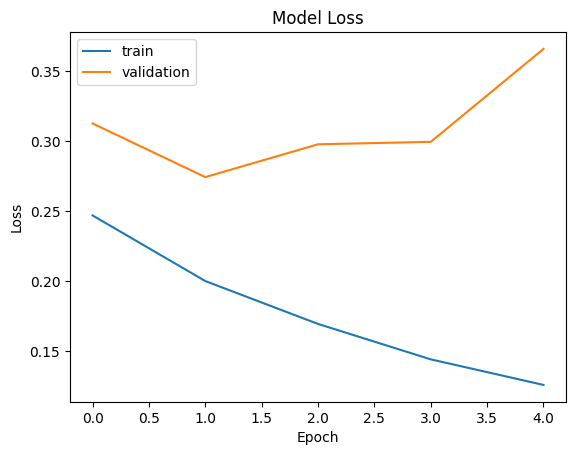

In [ ]:
# plot the train loss and validation loss with respect to epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

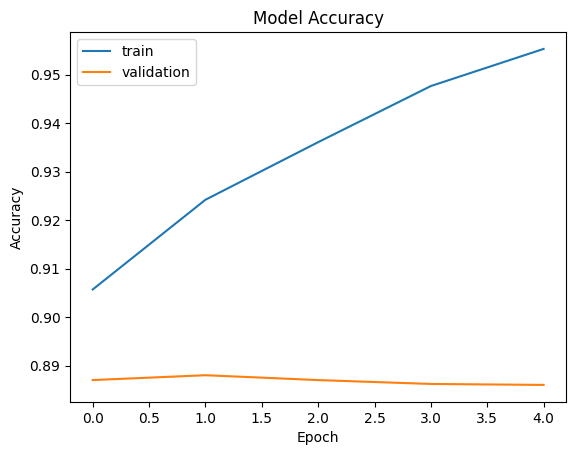

In [ ]:
# plot the train loss and validation loss with respect to epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()